In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/ilya/Desktop/GitHub_Repositories/HW_University/Data_Mining/datasets/heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.target.unique()

array([0, 1])

In [25]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
X = data.drop('target', axis=1)
y = data['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]

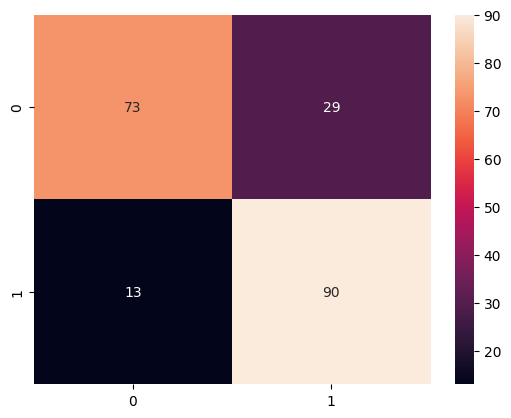

In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(conf_matrix, annot=True);

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## ROC-AUC Curve

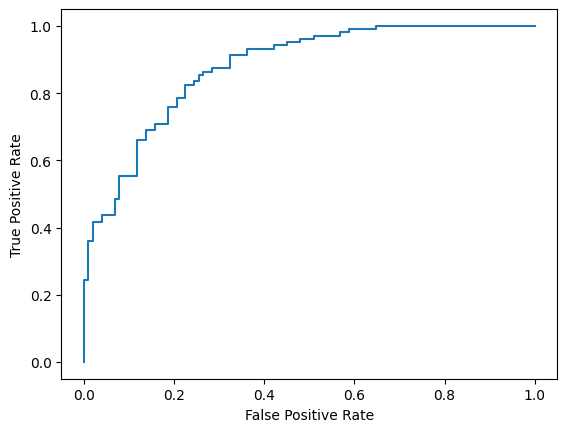

In [29]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

RocCurveDisplay(fpr=fpr, tpr=tpr).plot();

In [21]:
print(f"ROC-AUC = {auc(tpr, fpr).round(2)}")

ROC-AUC = 0.88


## RR-AUC Curve

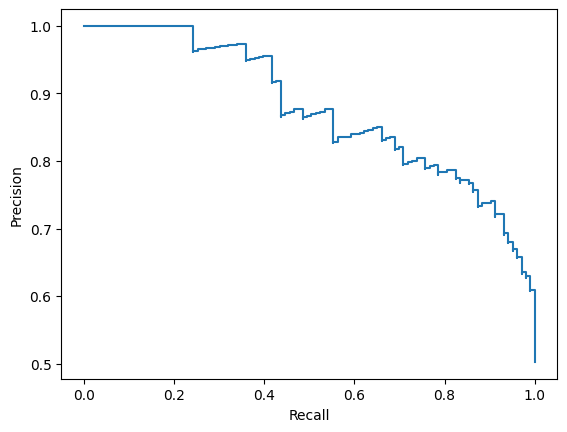

In [22]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

PrecisionRecallDisplay(precision, recall).plot();

In [27]:
print(f"PR-AUC = {auc(recall, precision).round(2)}")

PR-AUC = 0.88
